# 선형회귀

![image](https://user-images.githubusercontent.com/63278762/126752415-d5ed9306-898f-4a72-b85b-d2b1536334e5.png)

위의 그림처럼 두 변수 사이의 관계를 직선 형태로 가정하고 분석하는 것을 선형회귀분석이라고 한다.

* 종속 변수 : 어딘가에 종속해서 변하는 값
* 독립 변수 : 종속하지 않고 변하는 값

예를 들어 부모의 키와 자식의 키의 상관관계에 대해 생각을 해보면    
부모의 키가 독립 변수, 자식의 키가 종속 변수이다.    

선형 회귀 분석의 기본 가정에 부합한다면 먼저 회귀 분석을 시도해보는 것이 좋다.    
https://kkokkilkon.tistory.com/175    
1. 선형성 : 종속변수(y)와 독립변수(x) 간에 관계가 있다. -> 선형성을 만족한다.
2. 독립성 : 
3. 등분산성 : 분산이 같다.-> 특정한 패턴 없이 고르게 분포했다.
4. 정규성 : 정규분포를 띄는지 여부

## Linear Regression
종속변수 Y와 한개 이상의 독립변수 X와의 선형상관관계를 모델링하는 기법.    
* 독립변수가 1개인 것을 단순 선형회귀
* 독립변수가 여러개인 것을 다중 선형회귀

$$H = Wx + b$$

* H : 가정
* W : 가중치
* b : 편향

### 잔차(Residuals)
회귀모델을 이용해 추정한 값과 실제 데이터의 차이    
* 최소제곱법 : $$\sum_{i=1}^{n}residuals^2$$
=> 잔차 제곱 합을 최소로 하는 W와 b를 구하는 것이다. 
* 결정계수(R-squared, R2 score) : 회귀 모델이 잘 결정되었는지 확인하기 위한 계수
=> [결정계수 나무위키](https://namu.wiki/w/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98?from=%EA%B2%B0%EC%A0%95%20%EA%B3%84%EC%88%98)

In [6]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

boston = load_boston()
data, price = boston['data'], boston['target']
X_train, X_test, y_train, y_test=model_selection.train_test_split(data, price, test_size=0.2, random_state=25)

df = pd.DataFrame(X_train, columns=boston.feature_names)
print(f'boston shape: {data.shape}')
print(f'price shape: {price.shape}')
print(f'train shape:{X_train.shape}')
print(f'test shape:{X_test.shape}')

df.head()

boston shape: (506, 13)
price shape: (506,)
train shape:(404, 13)
test shape:(102, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.17134,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76
1,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64
2,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39
3,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64
4,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11


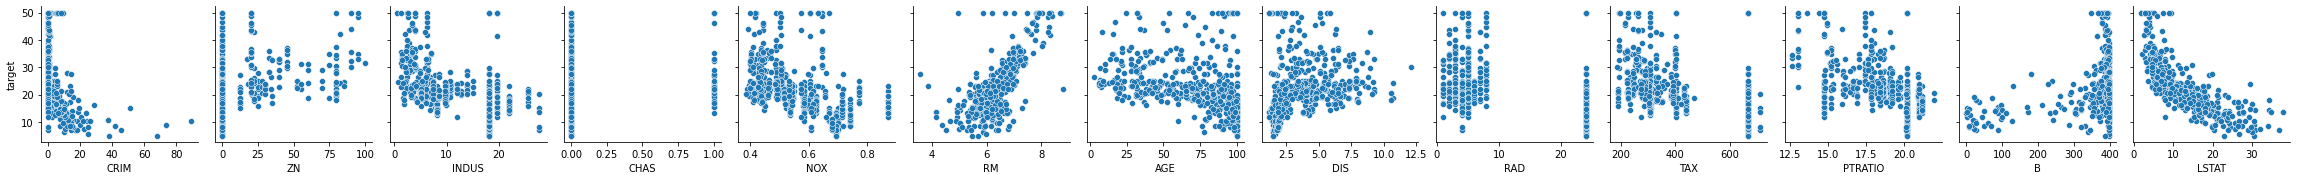

In [9]:
import seaborn as sns
boston_df = pd.DataFrame(boston['data'], columns=boston.feature_names)
boston_df['target'] = boston['target'] 
sns.pairplot(boston_df, x_vars=df.columns, y_vars='target')

### Gradient Descent Algorithm

손실(loss=cost)을 최소화하는 방향으로 동작하는 알고리즘
$$W := W-\alpha \frac{\partial}{\partial W}cost(W)$$
$\alpha$ : learning rate. 적절한 값으로 설정해야한다. (보통은 0.01로)    
https://lsh424.tistory.com/9

## Logistic Regression

classification supervised learning algorithm    
상한 : 1, 하한 : 0    
이진분류에서 많이 쓴다.    
$$\frac{1}{1+e^{(-x)}}$$

## Softmax와 Cross Entropy
#### Softmax
클래스 2개 이상의 분류에서 많이 쓰인다.

#### Cross Entropy
softmax의 손실함수로 쓰인다.